In [112]:
#import pliku i usunięcie wierszy bez żadnych wartości w kolumnie "Wartosc"
import pandas as pd
import matplotlib.pyplot as plt
data_path_ludnosc = "ludnosc.csv"
data_path_gminy = "gminy.csv"
df_gminy = pd.read_csv(data_path_gminy, sep=";", decimal=',')

C:\Users\Bartk\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [113]:
age_regions_df = df_gminy[(df_gminy.Kategoria == "Ludność wg grup wieku") & (df_gminy.Rok > 2009) ]
age_regions_df = age_regions_df[(age_regions_df.Nazwa.str.isupper() == True)]
age_regions_df = age_regions_df.drop(['Atrybut','Unnamed: 8','Kategoria'], axis=1)
display(age_regions_df)


,Kod,Nazwa,Zmienna,Rok,Wartosc,Jednostka miary
80738,0,POLSKA,ogółem,2010,38529866.0,osoba
80739,0,POLSKA,ogółem,2011,38538447.0,osoba
80740,0,POLSKA,ogółem,2012,38533299.0,osoba
80741,0,POLSKA,ogółem,2013,38495659.0,osoba
80742,0,POLSKA,ogółem,2014,38478602.0,osoba
...,...,...,...,...,...,...
368366,3200000,ZACHODNIOPOMORSKIE,65 i więcej,2016,276802.0,osoba
368367,3200000,ZACHODNIOPOMORSKIE,65 i więcej,2017,289263.0,osoba
368368,3200000,ZACHODNIOPOMORSKIE,65 i więcej,2018,301120.0,osoba
368369,3200000,ZACHODNIOPOMORSKIE,65 i więcej,2019,313021.0,osoba


## Rozkład liczebności grup wiekowych na przestrzeni lat

,Rok,Zmienna,Wartosc
2,2010,65 i więcej,13.471132
6,2011,65 i więcej,13.817409
10,2012,65 i więcej,14.241482
14,2013,65 i więcej,14.735708
18,2014,65 i więcej,15.265750
22,2015,65 i więcej,15.808674
26,2016,65 i więcej,16.401026
30,2017,65 i więcej,16.964984
34,2018,65 i więcej,17.527099
38,2019,65 i więcej,18.099408


,Rok,Zmienna,Wartosc
1,2010,15-64,71.330876
5,2011,15-64,71.083443
9,2012,15-64,70.715388
13,2013,15-64,70.271884
17,2014,15-64,69.754104
21,2015,15-64,69.220000
25,2016,15-64,68.577078
29,2017,15-64,67.881022
33,2018,15-64,67.203266
37,2019,15-64,66.560071


,Rok,Zmienna,Wartosc
0,2010,0-14,15.197992
4,2011,0-14,15.099148
8,2012,0-14,15.043129
12,2013,0-14,14.992407
16,2014,0-14,14.980147
20,2015,0-14,14.971325
24,2016,0-14,15.021896
28,2017,0-14,15.153994
32,2018,0-14,15.269635
36,2019,0-14,15.340521


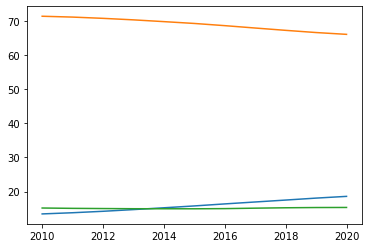

In [116]:
age_year = age_regions_df.groupby(['Rok','Zmienna']).sum().drop('Kod', axis=1)
age_year = age_year.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))*2 ## nie wiem czemu tutaj bez x2 sumuje do 50%
age_year = age_year.reset_index()
oldest_chart = pd.DataFrame()
oldest_chart = age_year[(age_year.Zmienna == "65 i więcej")]
display(oldest_chart)
middleage_chart = pd.DataFrame()
middleage_chart = age_year[(age_year.Zmienna == "15-64")]
display(middleage_chart)
youngest_chart = pd.DataFrame()
youngest_chart = age_year[(age_year.Zmienna == "0-14")]
display(youngest_chart)


plt.figure()
plt.plot(oldest_chart['Rok'], oldest_chart['Wartosc'])
plt.plot(oldest_chart['Rok'], middleage_chart['Wartosc'])
plt.plot(oldest_chart['Rok'], youngest_chart['Wartosc'])

## Najmłodszy i najstarszy region w Polsce w 2020 roku

In [182]:
age_region = age_regions_df[(age_regions_df.Rok == 2020)]
age_region = age_region.groupby(['Nazwa','Zmienna','Rok']).sum().drop('Kod', axis=1)
age_region = (age_region.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))*2).reset_index()
oldest_region = pd.DataFrame()
oldest_region = age_region[(age_region.Zmienna == "65 i więcej")].sort_values('Wartosc', ascending=False)
display(oldest_region.head(3))
youngest_region = pd.DataFrame()
youngest_region = age_region[(age_region.Zmienna == "0-14")].sort_values('Wartosc', ascending=False)
display(youngest_region.head(3))

,Nazwa,Zmienna,Rok,Wartosc
58,ŁÓDZKIE,65 i więcej,2020,20.671952
66,ŚWIĘTOKRZYSKIE,65 i więcej,2020,20.263983
62,ŚLĄSKIE,65 i więcej,2020,19.761749


,Nazwa,Zmienna,Rok,Wartosc
40,POMORSKIE,0-14,2020,16.855324
48,WIELKOPOLSKIE,0-14,2020,16.567919
16,MAZOWIECKIE,0-14,2020,16.524634
